# Atari Reinforcement Learning - Breakout Game

In [1]:
import numpy as np
import copy
import tensorflow as tf
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
from tensorflow.keras.optimizers import SGD, Adam, RMSprop
from tensorflow.keras import regularizers
from keras.layers import Dropout
from sklearn.preprocessing import StandardScaler
from abc import ABC, abstractmethod
from random import random
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
import os
import time
import tkinter as tk
from tkinter import messagebox
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import torch, torchvision, cv2
from torchvision.models.detection.faster_rcnn import FastRCNNPredictor
from torchvision.models.detection.mask_rcnn import MaskRCNNPredictor

#initialize for random seeds/states
tf.keras.backend.clear_session()
os.environ['PYTHONHASHSEED'] = '0'
rng = np.random.default_rng(12345)
np.random.seed(42)
tf.random.set_seed(42)

device = torch.device('cpu')
if torch.cuda.is_available():
   device = torch.device('cuda')

print(device)

cpu


# Import Arcade Learning Environment 

Let's choose a classic game and explore the environment variables.

In [2]:
# put in the 0 action 
import gym
env = gym.make('Breakout-v0')
env.reset()
observation_image, reward, done, info = env.step(0)
print('observation image shape: {}'.format(observation_image.shape))
print('observation image max: {}'.format(np.max(observation_image)))
print('reward: {}'.format(reward))
print('done: {}'.format(done))
print('info: {}'.format(info))

observation image shape: (210, 160, 3)
observation image max: 200
reward: 0.0
done: False
info: {'lives': 5, 'episode_frame_number': 2, 'frame_number': 2}


A.L.E: Arcade Learning Environment (version 0.7.4+069f8bd)
[Powered by Stella]


In [3]:
env.action_space

Discrete(4)

In [4]:
env.unwrapped.get_action_meanings()

['NOOP', 'FIRE', 'RIGHT', 'LEFT']

In [5]:
env.observation_space.shape

(210, 160, 3)

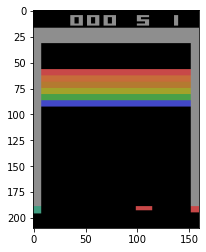

In [6]:
plt.imshow(observation_image)
plt.show()

In [7]:
observation_image[30:35,100,:]

array([[142, 142, 142],
       [142, 142, 142],
       [  0,   0,   0],
       [  0,   0,   0],
       [  0,   0,   0]], dtype=uint8)

In [8]:
observation_image[190:200,100,:]

array([[200,  72,  72],
       [200,  72,  72],
       [200,  72,  72],
       [  0,   0,   0],
       [  0,   0,   0],
       [  0,   0,   0],
       [  0,   0,   0],
       [  0,   0,   0],
       [  0,   0,   0],
       [  0,   0,   0]], dtype=uint8)

### Crop to exclude irrelevant parts 

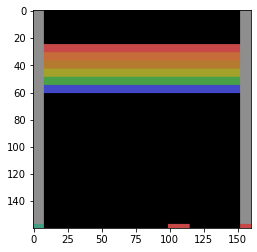

In [9]:
plt.imshow(observation_image[32:192])
plt.show()

In [10]:
R = observation_image[32:192,:,0]
G = observation_image[32:192,:,1]
B = observation_image[32:192,:,2]
grey = (0.299*R+0.587*G+0.114*B)/255

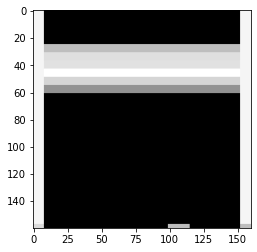

In [11]:
plt.imshow(grey, cmap='gray')
plt.show()

In [12]:
R.shape

(160, 160)

In [16]:
#Reference: Lab7 and https://docs.ray.io/en/latest/rllib/rllib-models.html
import ray
import ray.rllib.agents.dqn as dqn
from ray.tune.logger import pretty_print

config = dqn.DEFAULT_CONFIG.copy()

#config for framework and ALE game
config["framework"] = "torch"
config["env"] = 'Breakout-v0'

#rainbow DQN config
config["dueling"] = True
config["double_q"] = True
config["n_step"] = 4
config["prioritized_replay"] = True
config["num_atoms"] = 51
config["v_min"] = -1
config["v_max"] = 1
config["noisy"] = True

#model config  #conv_filters none means let it try
config["model"] = { "framestack":True, "dim":84, "conv_filters":None, "conv_activation":"relu", "post_fcnet_activation":"relu", "grayscale":True,}   

trainer = dqn.DQNTrainer(config=config)

# Can optionally call trainer.restore(path) to load a checkpoint.

avg_rewards = []

for i in range(100):
    # Perform one iteration of training the policy
    result = trainer.train()
    #print(pretty_print(result))
    print(result['episode_reward_mean'])
    avg_rewards.append(result['episode_reward_mean'])

    if i % 10 == 0:
        checkpoint = trainer.save()
        print("checkpoint saved at", checkpoint)

Install gputil for GPU system monitoring.


2.0
checkpoint saved at /Users/suenchihang/ray_results/DQNTrainer_Breakout-v0_2022-04-06_22-04-02p7xq_k3h/checkpoint_000001/checkpoint-1
2.1666666666666665
2.7777777777777777
2.2857142857142856
2.3529411764705883


KeyboardInterrupt: 

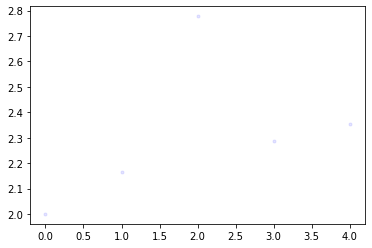

In [17]:
plt.plot(avg_rewards, 'b.', alpha=.1)